# 4 NumPy: Numerical Python

<img alt="Numpy logo" align="right" style="width:20%" src="https://numpy.org/_static/numpy_logo.png">

NumPy is flipping excellent. NumPy is at the heart of almost all scientific Python applications. If you are
not using NumPy directly you are probably using something that uses NumPy.  If you google around on the
topic of Python, you will undoubtedly find people saying:

> Python is slow

and they are not wrong, Python itself isn't very fast (although if you are a good programmer and write idomatic
Python you can get Python to be fast enough for many applications), but one of the super-powers of Python
is its extensibility. NumPy extends Python with many fast and well-tested C, C++ and Fortran libraries, and
provides *the* way to handle n-dimensional (e.g. anything from 1D to ~(inf -1)D) arrays of data in Python.

Lets first show that speed, and some of the additional simplicity that NumPy brings.  Lets start by
writing a function to add a number to every value in an array using a simple loop.

In [1]:
%matplotlib inline

In [2]:
def add_to_array(array, number_to_add):
    """ Add one number to all values in an array. """
    for number in array:
        number += number_to_add
    return array

To test how long his takes and compare to NumPy we will create an array (similar to a list)
of 1 million random numbers.  We will use NumPy's 
[random.randn](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randn.html#numpy.random.randn) 
function to make this array.  It is a standard convention to `import numpy as np`, you don't have to,
it is just people being lazy and trying to avoid typing `numpy` quite so many times.

To check what we have made we will look at the shape of the array. Every NumPy array has a `.shape` property,
which tells us the dimensions of the array (remember that a NumPy array is n-dimensional).  This shape is
returned as a `tuple` (hence the round brackets and comma).  We will make a 1x1e6 array, being 1D, only the
length is given.

In [3]:
import numpy as np

array = np.random.randn(int(1e6))
print(array.shape)

(1000000,)


Great, we have an array!  Lets try using our function to add 2 to every value in the array.  We don't really care
about the outcome of this, but we will test how long it takes using the `timeit` magic.  This is a jupyter/ipython
inline decorator. The outcome of it is that it times how long our function takes an averages over many loops.
Another aside: the line `# NBVAL_IGNORE_OUTPUT` is just for testing of notebooks, ignore it.

In [4]:
# NBVAL_IGNORE_OUTPUT
%timeit add_to_array(array, 2)

201 ms ± 7.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


On my computer I get something around 220 milli-seconds. 

Lets try the same with NumPy's add. We can just use the `+` symbol, or the `+=` for in-place
addition (note `+=` is faster, but doesn't work with the `timeit` magic).

In [5]:
# NBVAL_IGNORE_OUTPUT
%timeit array + 2

1.18 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


On my computer I get something around 920 micro-seconds, or around 200 times faster.  Both times are quite fast,
but when you are doing an operation many times, NumPy gets you free speed, yay!

So, NumPy is fast for some things... We are not going to provide an exhaustive NumPy tutorial here, for that
look to the [canonical NumPy tutorial](https://numpy.org/devdocs/user/quickstart.html). Instead, lets focus on
why you should (or might) care about NumPy by playing with some data.

In late 2013 to early 2014, we (led by scientists from VUW, GNS University of Otago and many other institutions
around the world) drilled an hole near the Alpine Fault.  Unfortunately we came up short of the Alpine Fault,
but we got some pretty amazing data from the hole.  The temperatures we observed were pretty unusual, and were
the topic of a [Nature paper led by Rupert Sutherland](https://www.nature.com/articles/nature22355).  We provided
the temperature data alongside the paper (temperatures were measured using a distributed fibre-optic sensing method),
and I have extracted a subset of the data for us to play with here.

If for some reason someone comes across these notebook and wants to use these data, get the raw data from the
paper and cite the paper!

NumPy provides a nice way to load data from a text-file:

In [6]:
temp_data = np.loadtxt(
    "data/Sutherland_etal_DFDP_temperatures.csv", delimiter=",",
    skiprows=1)
print(temp_data)

[[ 0.00000e+00  2.40000e-02  0.00000e+00  0.00000e+00  0.00000e+00
           nan]
 [ 1.00000e+00  2.60000e-02  0.00000e+00  0.00000e+00  1.00000e+00
   1.10590e+01]
 [ 2.00000e+00  3.00000e-02 -1.00000e-03  0.00000e+00  2.00000e+00
   1.05640e+01]
 ...
 [ 8.91000e+02  4.42910e+01 -8.14500e+01  2.40027e+02  8.16568e+02
           nan]
 [ 8.92000e+02  4.43390e+01 -8.16570e+01  2.40694e+02  8.17283e+02
           nan]
 [ 8.93000e+02  4.43820e+01 -8.18640e+01  2.41362e+02  8.17998e+02
           nan]]


Here we used the `delimiter` argument to tell NumPy that the file is comma separated (its a csv file),
and the `skiprows` argument to skip the header. Lets check what that header is:

In [7]:
with open("data/Sutherland_etal_DFDP_temperatures.csv", "r") as f:
    # Open the file read-only in a context-manager
    print(f.readline())
    # Read one line (the zeroth) from the file and print it.

﻿Drilled depth (m),Tilt (Degrees),Distance E (m),Distance N (m),True Vertical Depth (m),Temperature (degrees C)



Now we know what is in each column. We will see in the [pandas notebook](5-Pandas-introduction.ipynb) that there are
nicer ways of working with these kinds of data.

We can access the parts of the array by index, or slice.  A slice is a range of indexes, and allows us to grab
chunks of an array.  Lets work out what our array looks like and extract some data from it:

In [8]:
print(temp_data.shape)

(894, 6)


This means that our array has 894 x 6 elements, at the moment our data are indexed by row first, then column,
so that if we get the zeroth index of our data it will be the first row:

In [9]:
temp_data[0]

array([0.   , 0.024, 0.   , 0.   , 0.   ,   nan])

If we want the temperature (column 5, starting from 0) from the 4th row we would have to do:

In [10]:
temp_data[4][5]

9.798

This is all well and good, but I prefer to think of data like this in columns first, then rows.  We can transpose our data to get
it into the shape we want:

In [11]:
temp_data = temp_data.T
print(temp_data.shape)

(6, 894)


Now we can easily get all the temperatures by extracting the 5th column:

In [12]:
temp_data[5]

array([    nan,  11.059,  10.564,  10.121,   9.798,   9.679,   9.61 ,
         9.603,   9.614,   9.621,   9.623,   9.628,   9.635,   9.637,
         9.655,   9.679,   9.692,   9.754,   9.874,  10.034,  10.14 ,
        10.197,  10.261,  10.327,  10.409,  10.472,  10.543,  10.622,
        10.714,  10.758,  10.771,  10.782,  10.821,  10.904,  10.964,
        10.961,  10.987,  11.019,  11.068,  11.092,  11.131,  11.202,
        11.227,  11.25 ,  11.311,  11.335,  11.388,  11.457,  11.557,
        11.704,  11.841,  11.963,  12.122,  12.267,  12.406,  12.563,
        12.716,  12.865,  12.974,  13.107,  13.297,  13.535,  13.822,
        14.018,  14.162,  14.273,  14.341,  14.365,  14.39 ,  14.408,
        14.455,  14.541,  14.722,  15.16 ,  15.821,  16.252,  16.633,
        17.019,  17.338,  17.664,  17.983,  18.272,  18.546,  18.835,
        19.092,  19.328,  19.582,  19.865,  20.124,  20.355,  20.601,
        20.841,  21.076,  21.325,  21.575,  21.796,  22.037,  22.277,
        22.491,  22.

That looks horrible, lets plot it. I will plot against drilled depth here, which is in the zeroth column.

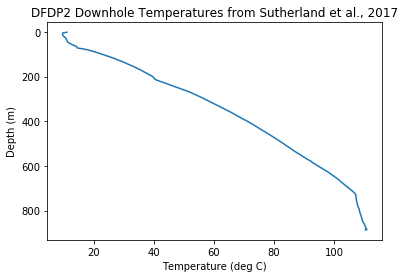

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(temp_data[5], temp_data[0])
ax.set_xlabel("Temperature (deg C)")
ax.set_ylabel("Depth (m)")
ax.set_title("DFDP2 Downhole Temperatures from Sutherland et al., 2017")
ax.invert_yaxis()  # Invert the y-axis so increasing depth is down

In the paper, we calculated temperature gradients in degrees per km.  This is simply division, and we can do this really
easily with NumPy. A simple formula:
\begin{equation}
    T\ gradient = \frac{change\ in\ T}{change\ in\ depth}
\end{equation}

So, we need the change in temperature and change in depth at every step. We can do this by subtracting a 1-sample
shifted version of our column of interest from the column, e.g.

In [14]:
temperature_change = temp_data[5][1:] - temp_data[5][0:-1]

This looks a bit funky, but all that we have done is sliced our array so that we get the fifth column (the temperatures)
(using the `[5]` index) and taken the elements of that column between the zeroth to n-1-th indexes away from
that data from the same column, but from the 1st to the n-th index. 

We will do the same for the depth:

In [15]:
depth_change =  temp_data[0][1:] - temp_data[0][0:-1]

Lets plot our change in temperature to make sure we have something sensible.  We need to plot against depth, but our change in temperature
is an average over a depth range. We will plot against the mid-point of the depths that the change in temperature is calculated over, lets
make a new array that is that mid-point depth:

In [16]:
mid_point_depth = temp_data[0][0:-1] + depth_change / 2

All that we have done is add half the change in depth to the depth. We have to ignore the final depth sample because
we don't have a gradient that corresponds to this (there is no data beyond the end of the borehole).

Now we can plot again:

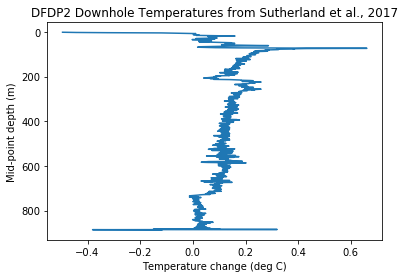

In [17]:
fig, ax = plt.subplots()
ax.plot(temperature_change, mid_point_depth)
ax.set_xlabel("Temperature change (deg C)")
ax.set_ylabel("Mid-point depth (m)")
ax.set_title("DFDP2 Downhole Temperatures from Sutherland et al., 2017")
ax.invert_yaxis()  # Invert the y-axis so increasing depth is down

Now we have the change in temperature and the change in depth we can calculate the temperature gradient at each point as a simple
division.

To get the units into degrees per km we will divide our change in depth by 1000 to convert to km first.

In [18]:
depth_change /= 1000
temperature_gradient = temperature_change / depth_change

Again, lets plot the result at the mid-points:

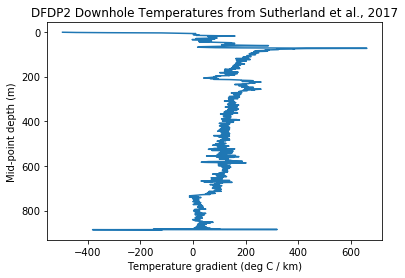

In [19]:
fig, ax = plt.subplots()
ax.plot(temperature_gradient, mid_point_depth)
ax.set_xlabel("Temperature gradient (deg C / km)")
ax.set_ylabel("Mid-point depth (m)")
ax.set_title("DFDP2 Downhole Temperatures from Sutherland et al., 2017")
ax.invert_yaxis()  # Invert the y-axis so increasing depth is down

A brief inspection shows that the last two plots look very similar, this is because the depth sampling is 1m.

**But wait!**  This isn't a true depth profile, this is just drilled depth...  We didn't drill a straight hole
(not deliberately, but these things happen when you are a few hundred meters down in highly-foliated schist...).

Lets have a look at what the hole looks like:

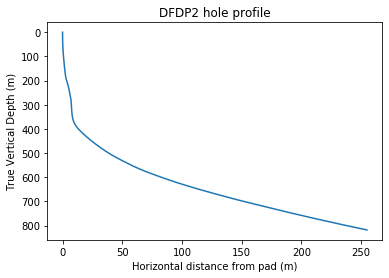

In [20]:
horizontal_distance = np.sqrt(temp_data[2] ** 2 + temp_data[3] ** 2)
fig, ax = plt.subplots()
ax.plot(horizontal_distance, temp_data[4])
ax.set_xlabel("Horizontal distance from pad (m)")
ax.set_ylabel("True Vertical Depth (m)")
ax.set_title("DFDP2 hole profile")
ax.invert_yaxis()  # Invert the y-axis so increasing depth is down

# Exercise:

Plot the temperature gradient against true vertical depth.  You will need to recalculate the depth changes and the temperature gradient to do this.

Do your plots look like the plot in the [Sutherland et al. paper](https://www.nature.com/articles/nature22355)?

In [21]:
# Your answer here